In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont, ImageTk
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import cv2

In [3]:
# Define paths
train_dir = r'C:\Users\megha\OneDrive\Desktop\mini project III yr II sem\dataset\train'
test_dir = r'C:\Users\megha\OneDrive\Desktop\mini project III yr II sem\dataset\test'

# Image dimensions
img_width, img_height = 224, 224
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(img_width, img_height), 
                                                    batch_size=batch_size, 
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(img_width, img_height), 
                                                  batch_size=batch_size, 
                                                  class_mode='binary')

Found 206 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [4]:
def build_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

cnn_model = build_cnn_model()

C:\Users\megha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
    
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

resnet_model = build_resnet_model()

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train CNN Model
cnn_history = cnn_model.fit(train_generator, 
                            steps_per_epoch=train_generator.samples // batch_size, 
                            validation_data=test_generator, 
                            validation_steps=test_generator.samples // batch_size, 
                            epochs=20, 
                            callbacks=[checkpoint, early_stopping])

# Train ResNet Model
resnet_history = resnet_model.fit(train_generator, 
                                  steps_per_epoch=train_generator.samples // batch_size, 
                                  validation_data=test_generator, 
                                  validation_steps=test_generator.samples // batch_size, 
                                  epochs=20, 
                                  callbacks=[checkpoint, early_stopping])

C:\Users\megha\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5124 - loss: 3.0885

6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.5123 - loss: 3.0218 - val_accuracy: 0.4219 - val_loss: 0.7809
Epoch 2/20
1/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5000 - loss: 0.7120

C:\Users\megha\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 698ms/step - accuracy: 0.5000 - loss: 0.7120 - val_accuracy: 0.4688 - val_loss: 0.6736
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5164 - loss: 0.6755

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5174 - loss: 0.6770 - val_accuracy: 0.6719 - val_loss: 0.6464
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 516ms/step - accuracy: 0.6875 - loss: 0.6718 - val_accuracy: 0.5938 - val_loss: 0.6398
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5957 - loss: 0.6723

6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5894 - loss: 0.6738 - val_accuracy: 0.7812 - val_loss: 0.6032
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7500 - loss: 0.6287 - val_accuracy: 0.7812 - val_loss: 0.6031
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.6981 - loss: 0.6228 - val_accuracy: 0.6562 - val_loss: 0.5735
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6875 - loss: 0.6288 - val_accuracy: 0.7812 - val_loss: 0.4988
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 101s 7s/step - accuracy: 0.7151 - loss: 0.5921 - val_accuracy: 0.6094 - val_loss: 0.5550
Epoch 10/20
1/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6250 - loss: 0.5171

6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6250 - loss: 0.5171 - val_accuracy: 0.8594 - val_loss: 0.4439
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 72s 12s/step - accuracy: 0.7271 - loss: 0.5294 - val_accuracy: 0.6875 - val_loss: 0.5296
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6562 - loss: 0.6865 - val_accuracy: 0.8125 - val_loss: 0.4409
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - accuracy: 0.7593 - loss: 0.4980 - val_accuracy: 0.8438 - val_loss: 0.4381
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 763ms/step - accuracy: 0.8125 - loss: 0.4990 - val_accuracy: 0.8281 - val_loss: 0.4087
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.7942 - loss: 0.4702 - val_accuracy: 0.7188 - val_loss: 0.4812
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 669ms/step - accuracy: 0.6250 - loss: 0.6640 - val_accuracy: 0.8281 - val_loss: 0.4087
Epoch 17/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7768 - loss: 0.4531

6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.7750 - loss: 0.4562 - val_accuracy: 0.8906 - val_loss: 0.3694
Epoch 18/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 445ms/step - accuracy: 0.9062 - loss: 0.4316 - val_accuracy: 0.8906 - val_loss: 0.3955
Epoch 19/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8659 - loss: 0.4114

6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.8637 - loss: 0.4133 - val_accuracy: 0.9688 - val_loss: 0.2123
Epoch 20/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 803ms/step - accuracy: 0.8438 - loss: 0.4056 - val_accuracy: 0.9375 - val_loss: 0.2521
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 561s 85s/step - accuracy: 0.4429 - loss: 4.4800 - val_accuracy: 0.4844 - val_loss: 0.7233
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 99s 6s/step - accuracy: 0.6250 - loss: 1.6445 - val_accuracy: 0.5312 - val_loss: 0.6935
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1398s 265s/step - accuracy: 0.8522 - loss: 0.4223 - val_accuracy: 0.4688 - val_loss: 1.9934
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 406s 38s/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 0.5312 - val_loss: 3.1603
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 981s 124s/step - accuracy: 0.9671 - loss: 0.1123 - val_accuracy: 0.4375 - val_loss: 6.2908
Epoch 6/20


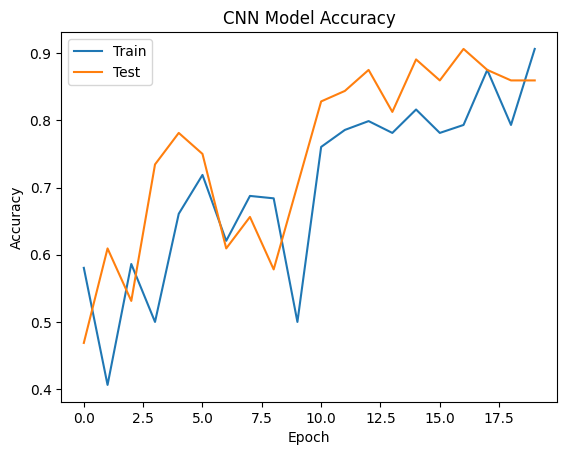

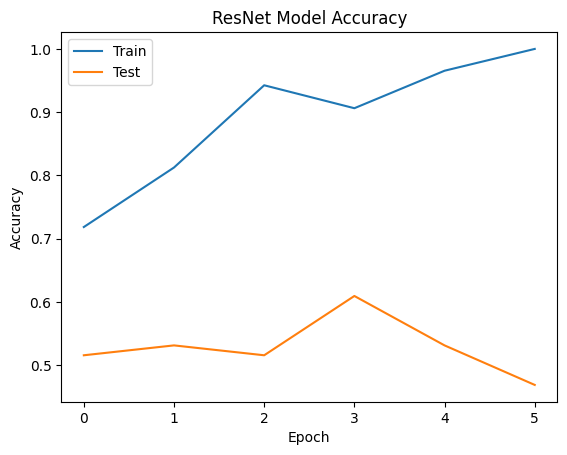

In [6]:
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_accuracy(cnn_history, 'CNN Model Accuracy')
plot_accuracy(resnet_history, 'ResNet Model Accuracy')

In [1]:
# Function to predict image
def predict_image(model, image_path):
    img = Image.open(image_path)
    img = img.resize((img_width, img_height))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    result = "Infected" if prediction > 0.5 else "Not Infected"
    
    # Overlay text on the image
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()  # You can customize the font if needed
    text = f"Result: {result}"
    draw.text((10, 10), text, fill="red", font=font)
    
    # Save the image with the result
    output_path = "output_image.jpg"
    img.save(output_path)
    
    return output_path, result

# Function to open camera and capture image
def open_camera():
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        cv2.imshow('Press Space to Capture', frame)
        if cv2.waitKey(1) & 0xFF == ord(' '):
            cv2.imwrite('captured_image.jpg', frame)
            break
    cap.release()
    cv2.destroyAllWindows()
    return 'captured_image.jpg'

# Function to upload image
def upload_image():
    file_path = filedialog.askopenfilename()
    return file_path

# Function to show prediction interface
def show_prediction(model):
    def on_click():
        choice = choice_var.get()
        if choice == 1:
            image_path = upload_image()
        elif choice == 2:
            image_path = open_camera()
        else:
            messagebox.showerror("Error", "Invalid choice")
            return
        
        output_path, result = predict_image(model, image_path)
        
        # Display the image with the result
        result_window = tk.Toplevel()
        result_window.title("Prediction Result")
        
        img = Image.open(output_path)
        img = img.resize((400, 400))  # Resize for display
        img_tk = ImageTk.PhotoImage(img)
        
        label = tk.Label(result_window, image=img_tk)
        label.image = img_tk  # Keep a reference to avoid garbage collection
        label.pack()
        
        tk.Label(result_window, text=f"Result: {result}", font=("Arial", 16)).pack()
    
    # Create the main interface
    root = tk.Tk()
    root.title("Gingivitis Detection")
    root.geometry("400x200")  # Set the size of the interface
    
    choice_var = tk.IntVar()
    
    tk.Label(root, text="Choose an option:", font=("Arial", 14)).pack()
    tk.Radiobutton(root, text="Upload Image", variable=choice_var, value=1, font=("Arial", 12)).pack()
    tk.Radiobutton(root, text="Access Camera", variable=choice_var, value=2, font=("Arial", 12)).pack()
    
    tk.Button(root, text="Detect", command=on_click, font=("Arial", 12)).pack()
    
    root.mainloop()

# Example usage
# Assuming `cnn_model` and `resnet_model` are already trained and loaded
show_prediction(cnn_model)  # For CNN Model
show_prediction(resnet_model)  # For ResNet Model

NameError: name 'cnn_model' is not defined